Train Agent to play Tic-Tac-Toe
=========================

This notebook serves to train a DQN agent to play against another learning agent, in order to learn how to play the game and then it could be used to play against a human.

### Import dependencies

In [1]:
from tateti.agent.base import play_one
from tateti.agent.dqn import DQNAgent
from tateti.environment.tictactoe import Environment
from tateti.util.plot import plot_moving_avg, plot

import numpy as np
import random

import argparse

Using TensorFlow backend.


### Create and configure environment to use for playing Tic-Tac-Toe

In [2]:
reward_function = "standard"  # Reward function to use on the environment
seed = 123  # Define seed for random generators
print("Using seed=%i" % seed)  
env = Environment(reward_function=reward_function, seed=seed)

print("Environment created!")

Using seed=123
Environment created!


### Create agents that are going to learn to play Tic-Tac-Toe

In [3]:
# Path to filename for saving the best agent (and even load a saved agent as well)
path_to_model = "/models/tateti_model.pkl"

# Parameters of DQN agent
gamma = 0.95  # Discount factor
replay_mem = 400  # Max amount of sequences to store in experience replay memory
batch_size = 10  # Number of sequences to sample from experience replay memory while applying it to agent
phi_function = "scaled"  # Phi function to use for transforming states into a better representation for the agent
# strategy_function: to deal with exploration-exploitation dilemma

# TODO: not having deterministic results when strategy_function="boltzmann"
agent_x = (DQNAgent(env=env, gamma=gamma, phi_function=phi_function, strategy_function="egreedy",
                    memory_size=replay_mem, batch_size=batch_size)
          #.load(path_to_model)  # Uncomment to load a previous saved agent
          )

agent_o = (DQNAgent(env=env, gamma=gamma, phi_function=phi_function, strategy_function="egreedy",
                    memory_size=replay_mem, batch_size=batch_size)
          #.load(path_to_model)  # Uncomment to load a previous saved agent
          )

Instructions for updating:
Colocations handled automatically by placer.


### Configure experiments to perform

In [4]:
N = 1000  # Number of episodes to run 
total_rewards = {Environment.SYMBOL_X: np.empty(N), Environment.SYMBOL_O: np.empty(N)}  # Total of reward obtained per agent

### Start playing and learning!

In [5]:
for n in range(N):
    total_reward, steps, is_over = play_one(agent_x, agent_o, env)

    for sym in total_reward:
        total_rewards[sym][n] = total_reward[sym]

    if n % 10 == 0:
        avg_rew = {Environment.sym_repr[s]: v[max(0, n-10):(n+1)].mean() for (s, v) in total_rewards.items()}
        print("Episode:%i, avg reward (last 10): %s" % (n, avg_rew))
        print("Current status of board:")
        env.draw_board(logger_func=print)
        print("Score board: %s" % str(env.score))
        
    if n % (N/10) == 0:
        agent_x.strategy.reset()
        agent_o.strategy.reset()

    seed = random.randint(0, 1000)

    env.reset()

2019-03-09 12:36:26,396 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:36:26,401 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:36:26,407 - tateti.agent.base - INFO - GAME OVER! Winner: x


Episode:0, avg reward (last 10): {'x': 1.0, 'o': 0.0}
Current status of board:
-------------
| o |   | x |
-------------
|   |   | x |
-------------
|   | o | x |
-------------
Score board: {'x': 1, 'o': 0, ' ': 0}
Instructions for updating:
Use tf.cast instead.


2019-03-09 12:36:27,383 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:36:27,511 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:36:27,673 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:36:27,816 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:36:27,908 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:36:28,035 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:36:28,125 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:36:28,251 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:36:28,342 - tateti.agent.base - INFO - GAME OVER! Winner: o


Episode:10, avg reward (last 10): {'x': 0.6363636363636364, 'o': 0.36363636363636365}
Current status of board:
-------------
| x | o | o |
-------------
|   | o |   |
-------------
| o | x | x |
-------------
Score board: {'x': 7, 'o': 4, ' ': 0}


2019-03-09 12:36:28,472 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:36:28,599 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:36:28,723 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:36:28,829 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:36:28,936 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:36:29,078 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:36:29,238 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:36:29,361 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:36:29,519 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:36:29,662 - tateti.agent.base - INFO - GAME OVER! Winner: o


Episode:20, avg reward (last 10): {'x': 0.36363636363636365, 'o': 0.45454545454545453}
Current status of board:
-------------
| x | x | o |
-------------
| o | o | x |
-------------
| x | o | x |
-------------
Score board: {'x': 11, 'o': 8, ' ': 2}


2019-03-09 12:36:29,826 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:36:29,967 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:36:30,130 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:36:30,271 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:36:30,426 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:36:30,592 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:36:30,681 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:36:30,767 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:36:30,890 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:36:30,993 - tateti.agent.base - INFO - GAME OVER! Winner: x


Episode:30, avg reward (last 10): {'x': 0.5454545454545454, 'o': 0.2727272727272727}
Current status of board:
-------------
| o | x | x |
-------------
|   | x | o |
-------------
| x | o |   |
-------------
Score board: {'x': 17, 'o': 11, ' ': 3}


2019-03-09 12:36:31,155 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:36:31,267 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:36:31,367 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:36:31,490 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:36:31,611 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:36:31,713 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:36:31,867 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:36:32,008 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:36:32,139 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:36:32,264 - tateti.agent.base - INFO - GAME OVER! Winner: x


Episode:40, avg reward (last 10): {'x': 0.5454545454545454, 'o': 0.45454545454545453}
Current status of board:
-------------
| x | x | x |
-------------
| o | x |   |
-------------
| o |   | o |
-------------
Score board: {'x': 22, 'o': 16, ' ': 3}


2019-03-09 12:36:32,360 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:36:32,530 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:36:32,692 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:36:32,840 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:36:32,977 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:36:33,103 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:36:33,264 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:36:33,406 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:36:33,530 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:36:33,680 - tateti.agent.base - INFO - GAME OVER! Winner: o


Episode:50, avg reward (last 10): {'x': 0.36363636363636365, 'o': 0.36363636363636365}
Current status of board:
-------------
| x | o | x |
-------------
| o | o | o |
-------------
|   | x |   |
-------------
Score board: {'x': 25, 'o': 20, ' ': 6}


2019-03-09 12:36:33,809 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:36:33,958 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:36:34,115 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:36:34,258 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:36:34,414 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:36:34,564 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:36:34,670 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:36:34,800 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:36:34,952 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:36:35,118 - tateti.agent.base - INFO - GAME OVER! Winner: None


Episode:60, avg reward (last 10): {'x': 0.45454545454545453, 'o': 0.45454545454545453}
Current status of board:
-------------
| o | x | x |
-------------
| o | x | o |
-------------
| x | o | x |
-------------
Score board: {'x': 30, 'o': 24, ' ': 7}


2019-03-09 12:36:35,265 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:36:35,407 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:36:35,533 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:36:35,691 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:36:35,844 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:36:35,948 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:36:36,101 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:36:36,263 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:36:36,410 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:36:36,543 - tateti.agent.base - INFO - GAME OVER! Winner: x


Episode:70, avg reward (last 10): {'x': 0.2727272727272727, 'o': 0.5454545454545454}
Current status of board:
-------------
| o | o | x |
-------------
| x | x | x |
-------------
| x | o | o |
-------------
Score board: {'x': 32, 'o': 30, ' ': 9}


2019-03-09 12:36:36,698 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:36:36,832 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:36:36,984 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:36:37,148 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:36:37,289 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:36:37,489 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:36:37,588 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:36:37,737 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:36:37,867 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:36:37,986 - tateti.agent.base - INFO - GAME OVER! Winner: o


Episode:80, avg reward (last 10): {'x': 0.5454545454545454, 'o': 0.2727272727272727}
Current status of board:
-------------
|   | o | x |
-------------
| o | x | x |
-------------
| o | o | x |
-------------
Score board: {'x': 37, 'o': 33, ' ': 11}


2019-03-09 12:36:38,128 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:36:38,290 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:36:38,401 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:36:38,541 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:36:38,669 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:36:38,835 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:36:38,979 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:36:39,150 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:36:39,308 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:36:39,467 - tateti.agent.base - INFO - GAME OVER! Winner: o


Episode:90, avg reward (last 10): {'x': 0.36363636363636365, 'o': 0.45454545454545453}
Current status of board:
-------------
| o | x | o |
-------------
| x | x | x |
-------------
| x | o | o |
-------------
Score board: {'x': 40, 'o': 38, ' ': 13}


2019-03-09 12:36:39,624 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:36:39,770 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:36:39,902 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:36:40,004 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:36:40,107 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:36:40,244 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:36:40,394 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:36:40,530 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:36:40,615 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:36:40,736 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:36:40,807 - tateti.agent.base - INFO - GAME OVER! Winner: o


Episode:100, avg reward (last 10): {'x': 0.45454545454545453, 'o': 0.45454545454545453}
Current status of board:
-------------
|   |   | o |
-------------
| x |   | o |
-------------
|   | x | o |
-------------
Score board: {'x': 44, 'o': 43, ' ': 14}


2019-03-09 12:36:40,929 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:36:41,046 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:36:41,175 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:36:41,249 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:36:41,361 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:36:41,495 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:36:41,649 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:36:41,805 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:36:41,954 - tateti.agent.base - INFO - GAME OVER! Winner: o


Episode:110, avg reward (last 10): {'x': 0.5454545454545454, 'o': 0.2727272727272727}
Current status of board:
-------------
| o | o | x |
-------------
| o | o | x |
-------------
| x | x | x |
-------------
Score board: {'x': 50, 'o': 45, ' ': 16}


2019-03-09 12:36:42,077 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:36:42,199 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:36:42,355 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:36:42,511 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:36:42,604 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:36:42,741 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:36:42,868 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:36:42,994 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:36:43,136 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:36:43,303 - tateti.agent.base - INFO - GAME OVER! Winner: None


Episode:120, avg reward (last 10): {'x': 0.36363636363636365, 'o': 0.45454545454545453}
Current status of board:
-------------
| o | x | o |
-------------
| o | o |   |
-------------
| x | x | x |
-------------
Score board: {'x': 53, 'o': 50, ' ': 18}


2019-03-09 12:36:43,461 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:36:43,616 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:36:43,775 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:36:43,862 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:36:43,966 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:36:44,089 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:36:44,209 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:36:44,368 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:36:44,494 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:36:44,653 - tateti.agent.base - INFO - GAME OVER! Winner: x


Episode:130, avg reward (last 10): {'x': 0.2727272727272727, 'o': 0.36363636363636365}
Current status of board:
-------------
| o | x | x |
-------------
| o | o | o |
-------------
| x | o | x |
-------------
Score board: {'x': 55, 'o': 54, ' ': 22}


2019-03-09 12:36:44,792 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:36:44,877 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:36:44,975 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:36:45,105 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:36:45,192 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:36:45,343 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:36:45,498 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:36:45,636 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:36:45,723 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:36:45,848 - tateti.agent.base - INFO - GAME OVER! Winner: x


Episode:140, avg reward (last 10): {'x': 0.45454545454545453, 'o': 0.5454545454545454}
Current status of board:
-------------
| x |   | o |
-------------
|   | x | o |
-------------
|   |   | x |
-------------
Score board: {'x': 60, 'o': 59, ' ': 22}


2019-03-09 12:36:45,975 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:36:46,117 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:36:46,248 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:36:46,395 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:36:46,533 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:36:46,693 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:36:46,846 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:36:46,971 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:36:47,111 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:36:47,248 - tateti.agent.base - INFO - GAME OVER! Winner: o


Episode:150, avg reward (last 10): {'x': 0.5454545454545454, 'o': 0.2727272727272727}
Current status of board:
-------------
| x | x | o |
-------------
| o | x |   |
-------------
| o | o | x |
-------------
Score board: {'x': 65, 'o': 62, ' ': 24}


2019-03-09 12:36:47,396 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:36:47,522 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:36:47,684 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:36:47,840 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:36:47,950 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:36:48,093 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:36:48,176 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:36:48,332 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:36:48,490 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:36:48,636 - tateti.agent.base - INFO - GAME OVER! Winner: o


Episode:160, avg reward (last 10): {'x': 0.45454545454545453, 'o': 0.2727272727272727}
Current status of board:
-------------
| x | x | o |
-------------
| o | o | o |
-------------
| o | x | x |
-------------
Score board: {'x': 69, 'o': 65, ' ': 27}


2019-03-09 12:36:48,733 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:36:48,860 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:36:49,023 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:36:49,181 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:36:49,312 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:36:49,385 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:36:49,487 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:36:49,616 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:36:49,720 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:36:49,823 - tateti.agent.base - INFO - GAME OVER! Winner: x


Episode:170, avg reward (last 10): {'x': 0.45454545454545453, 'o': 0.2727272727272727}
Current status of board:
-------------
| x | o | o |
-------------
| x | x | o |
-------------
| x |   |   |
-------------
Score board: {'x': 74, 'o': 67, ' ': 30}


2019-03-09 12:36:49,957 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:36:50,086 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:36:50,217 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:36:50,347 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:36:50,475 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:36:50,562 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:36:50,651 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:36:50,752 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:36:50,878 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:36:51,021 - tateti.agent.base - INFO - GAME OVER! Winner: x


Episode:180, avg reward (last 10): {'x': 0.2727272727272727, 'o': 0.5454545454545454}
Current status of board:
-------------
| o | x | x |
-------------
|   | o | x |
-------------
| o | x | o |
-------------
Score board: {'x': 76, 'o': 73, ' ': 32}


2019-03-09 12:36:51,187 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:36:51,296 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:36:51,425 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:36:51,520 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:36:51,651 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:36:51,812 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:36:51,959 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:36:52,083 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:36:52,209 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:36:52,324 - tateti.agent.base - INFO - GAME OVER! Winner: o


Episode:190, avg reward (last 10): {'x': 0.36363636363636365, 'o': 0.6363636363636364}
Current status of board:
-------------
| x | o |   |
-------------
| x | x | o |
-------------
| x |   | o |
-------------
Score board: {'x': 80, 'o': 79, ' ': 32}


2019-03-09 12:36:52,482 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:36:52,641 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:36:52,800 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:36:52,938 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:36:53,099 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:36:53,237 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:36:53,327 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:36:53,484 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:36:53,632 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:36:53,780 - tateti.agent.base - INFO - GAME OVER! Winner: o


Episode:200, avg reward (last 10): {'x': 0.45454545454545453, 'o': 0.45454545454545453}
Current status of board:
-------------
| o |   | x |
-------------
| x | x | o |
-------------
| x | o | o |
-------------
Score board: {'x': 84, 'o': 84, ' ': 33}


2019-03-09 12:36:53,903 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:36:54,014 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:36:54,142 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:36:54,312 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:36:54,474 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:36:54,637 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:36:54,773 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:36:54,938 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:36:55,088 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:36:55,227 - tateti.agent.base - INFO - GAME OVER! Winner: x


Episode:210, avg reward (last 10): {'x': 0.6363636363636364, 'o': 0.18181818181818182}
Current status of board:
-------------
| x | o | x |
-------------
| o | x |   |
-------------
| o | o | x |
-------------
Score board: {'x': 90, 'o': 86, ' ': 35}


2019-03-09 12:36:55,382 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:36:55,501 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:36:55,642 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:36:55,774 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:36:55,918 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:36:56,039 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:36:56,184 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:36:56,287 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:36:56,438 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:36:56,589 - tateti.agent.base - INFO - GAME OVER! Winner: x


Episode:220, avg reward (last 10): {'x': 0.5454545454545454, 'o': 0.36363636363636365}
Current status of board:
-------------
| x | x | o |
-------------
| x | o | o |
-------------
| o | o | x |
-------------
Score board: {'x': 95, 'o': 90, ' ': 36}


2019-03-09 12:36:56,683 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:36:56,830 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:36:56,931 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:36:57,023 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:36:57,112 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:36:57,239 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:36:57,398 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:36:57,578 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:36:57,733 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:36:57,901 - tateti.agent.base - INFO - GAME OVER! Winner: None


Episode:230, avg reward (last 10): {'x': 0.2727272727272727, 'o': 0.6363636363636364}
Current status of board:
-------------
| o | x | x |
-------------
| x | o | o |
-------------
| x | o | o |
-------------
Score board: {'x': 98, 'o': 96, ' ': 37}


2019-03-09 12:36:58,028 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:36:58,174 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:36:58,296 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:36:58,483 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:36:58,623 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:36:58,752 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:36:58,909 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:36:59,037 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:36:59,162 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:36:59,252 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:36:59,339 - tateti.agent.base - INFO - GAME OVER! Winner: o


Episode:240, avg reward (last 10): {'x': 0.36363636363636365, 'o': 0.5454545454545454}
Current status of board:
-------------
|   |   | x |
-------------
| o | x | x |
-------------
| o | o | x |
-------------
Score board: {'x': 102, 'o': 101, ' ': 38}


2019-03-09 12:36:59,457 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:36:59,593 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:36:59,716 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:36:59,859 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:36:59,981 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:00,139 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:00,267 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:00,435 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:00,569 - tateti.agent.base - INFO - GAME OVER! Winner: x


Episode:250, avg reward (last 10): {'x': 0.36363636363636365, 'o': 0.6363636363636364}
Current status of board:
-------------
| o | x | x |
-------------
|   | o | x |
-------------
| x | o | o |
-------------
Score board: {'x': 105, 'o': 108, ' ': 38}


2019-03-09 12:37:00,744 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:37:00,823 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:00,976 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:01,135 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:37:01,264 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:01,392 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:01,551 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:01,712 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:37:01,855 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:02,010 - tateti.agent.base - INFO - GAME OVER! Winner: None


Episode:260, avg reward (last 10): {'x': 0.2727272727272727, 'o': 0.45454545454545453}
Current status of board:
-------------
| o | o | x |
-------------
| o | x | x |
-------------
| o | x | o |
-------------
Score board: {'x': 108, 'o': 112, ' ': 41}


2019-03-09 12:37:02,154 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:02,277 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:02,408 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:02,541 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:02,660 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:02,812 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:37:02,947 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:03,098 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:03,245 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:37:03,331 - tateti.agent.base - INFO - GAME OVER! Winner: o


Episode:270, avg reward (last 10): {'x': 0.18181818181818182, 'o': 0.5454545454545454}
Current status of board:
-------------
| o | x | o |
-------------
| x | o | x |
-------------
| x | o | x |
-------------
Score board: {'x': 110, 'o': 117, ' ': 44}


2019-03-09 12:37:03,487 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:03,632 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:37:03,753 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:03,881 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:37:03,997 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:04,125 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:04,207 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:04,364 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:04,454 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:04,597 - tateti.agent.base - INFO - GAME OVER! Winner: o


Episode:280, avg reward (last 10): {'x': 0.36363636363636365, 'o': 0.36363636363636365}
Current status of board:
-------------
|   | x | o |
-------------
|   |   | o |
-------------
| x |   | o |
-------------
Score board: {'x': 114, 'o': 121, ' ': 46}


2019-03-09 12:37:04,787 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:04,909 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:05,030 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:05,188 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:05,294 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:05,378 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:05,532 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:05,652 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:05,772 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:05,932 - tateti.agent.base - INFO - GAME OVER! Winner: None


Episode:290, avg reward (last 10): {'x': 0.5454545454545454, 'o': 0.45454545454545453}
Current status of board:
-------------
| o | x |   |
-------------
| x | o |   |
-------------
| x | o | o |
-------------
Score board: {'x': 120, 'o': 125, ' ': 46}


2019-03-09 12:37:06,059 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:06,217 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:37:06,305 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:06,431 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:06,553 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:06,737 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:06,876 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:06,961 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:07,096 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:07,250 - tateti.agent.base - INFO - GAME OVER! Winner: None


Episode:300, avg reward (last 10): {'x': 0.18181818181818182, 'o': 0.6363636363636364}
Current status of board:
-------------
| o |   | o |
-------------
| x | x | x |
-------------
| x | o | o |
-------------
Score board: {'x': 122, 'o': 131, ' ': 48}


2019-03-09 12:37:07,407 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:07,494 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:07,615 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:07,719 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:07,818 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:07,936 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:08,087 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:08,237 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:08,341 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:08,493 - tateti.agent.base - INFO - GAME OVER! Winner: o


Episode:310, avg reward (last 10): {'x': 0.36363636363636365, 'o': 0.5454545454545454}
Current status of board:
-------------
|   | o | o |
-------------
| x | x | x |
-------------
|   |   | o |
-------------
Score board: {'x': 125, 'o': 137, ' ': 49}


2019-03-09 12:37:08,615 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:08,766 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:08,916 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:09,072 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:09,189 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:09,319 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:09,499 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:37:09,639 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:09,751 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:09,895 - tateti.agent.base - INFO - GAME OVER! Winner: x


Episode:320, avg reward (last 10): {'x': 0.5454545454545454, 'o': 0.36363636363636365}
Current status of board:
-------------
| x | x | x |
-------------
|   | x | o |
-------------
| o | o |   |
-------------
Score board: {'x': 130, 'o': 141, ' ': 50}


2019-03-09 12:37:10,039 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:10,158 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:10,296 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:10,414 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:10,552 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:10,702 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:37:10,855 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:11,004 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:37:11,138 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:11,258 - tateti.agent.base - INFO - GAME OVER! Winner: x


Episode:330, avg reward (last 10): {'x': 0.6363636363636364, 'o': 0.18181818181818182}
Current status of board:
-------------
| x | x | x |
-------------
|   | o | o |
-------------
| o | o | x |
-------------
Score board: {'x': 136, 'o': 143, ' ': 52}


2019-03-09 12:37:11,380 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:11,484 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:11,566 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:11,713 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:11,881 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:11,992 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:12,162 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:12,254 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:12,400 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:12,551 - tateti.agent.base - INFO - GAME OVER! Winner: x


Episode:340, avg reward (last 10): {'x': 0.18181818181818182, 'o': 0.8181818181818182}
Current status of board:
-------------
| x | x | o |
-------------
|   | o | x |
-------------
| o | o | x |
-------------
Score board: {'x': 137, 'o': 152, ' ': 52}


2019-03-09 12:37:12,704 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:12,855 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:13,019 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:37:13,189 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:37:13,353 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:37:13,484 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:13,592 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:13,738 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:13,883 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:14,008 - tateti.agent.base - INFO - GAME OVER! Winner: x


Episode:350, avg reward (last 10): {'x': 0.18181818181818182, 'o': 0.5454545454545454}
Current status of board:
-------------
| o | x | x |
-------------
| o | x |   |
-------------
| o | o | x |
-------------
Score board: {'x': 139, 'o': 157, ' ': 55}


2019-03-09 12:37:14,103 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:14,254 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:14,415 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:14,509 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:14,638 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:14,732 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:14,901 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:15,014 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:15,144 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:15,295 - tateti.agent.base - INFO - GAME OVER! Winner: o


Episode:360, avg reward (last 10): {'x': 0.36363636363636365, 'o': 0.6363636363636364}
Current status of board:
-------------
| o | o | o |
-------------
| o | x |   |
-------------
| x | x |   |
-------------
Score board: {'x': 143, 'o': 163, ' ': 55}


2019-03-09 12:37:15,465 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:15,575 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:15,723 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:15,890 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:16,036 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:16,199 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:16,366 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:16,530 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:16,694 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:16,809 - tateti.agent.base - INFO - GAME OVER! Winner: x


Episode:370, avg reward (last 10): {'x': 0.5454545454545454, 'o': 0.45454545454545453}
Current status of board:
-------------
| o | x | x |
-------------
| x | x | o |
-------------
| o | x | o |
-------------
Score board: {'x': 149, 'o': 167, ' ': 55}


2019-03-09 12:37:16,980 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:17,109 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:17,237 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:17,404 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:37:17,530 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:17,661 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:17,791 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:17,965 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:18,065 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:18,189 - tateti.agent.base - INFO - GAME OVER! Winner: o


Episode:380, avg reward (last 10): {'x': 0.45454545454545453, 'o': 0.45454545454545453}
Current status of board:
-------------
|   | o |   |
-------------
| x | o | x |
-------------
| x | o |   |
-------------
Score board: {'x': 153, 'o': 172, ' ': 56}


2019-03-09 12:37:18,322 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:18,454 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:18,579 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:18,686 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:18,848 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:19,005 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:19,095 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:19,250 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:19,380 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:19,479 - tateti.agent.base - INFO - GAME OVER! Winner: x


Episode:390, avg reward (last 10): {'x': 0.36363636363636365, 'o': 0.6363636363636364}
Current status of board:
-------------
|   | o | x |
-------------
| o | o | o |
-------------
| x | x |   |
-------------
Score board: {'x': 157, 'o': 178, ' ': 56}


2019-03-09 12:37:19,620 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:19,699 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:19,831 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:19,950 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:20,072 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:20,195 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:20,302 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:20,461 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:20,583 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:20,743 - tateti.agent.base - INFO - GAME OVER! Winner: x


Episode:400, avg reward (last 10): {'x': 0.36363636363636365, 'o': 0.6363636363636364}
Current status of board:
-------------
|   | o | o |
-------------
| x | x | x |
-------------
| x | o |   |
-------------
Score board: {'x': 161, 'o': 184, ' ': 56}


2019-03-09 12:37:20,884 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:21,022 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:37:21,184 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:21,341 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:21,465 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:21,583 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:21,702 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:21,854 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:21,942 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:22,062 - tateti.agent.base - INFO - GAME OVER! Winner: o


Episode:410, avg reward (last 10): {'x': 0.5454545454545454, 'o': 0.36363636363636365}
Current status of board:
-------------
| o |   | x |
-------------
| o | x |   |
-------------
| x |   |   |
-------------
Score board: {'x': 166, 'o': 188, ' ': 57}


2019-03-09 12:37:22,151 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:22,269 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:22,389 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:22,541 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:37:22,688 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:37:22,835 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:37:22,952 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:23,075 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:23,209 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:23,341 - tateti.agent.base - INFO - GAME OVER! Winner: x


Episode:420, avg reward (last 10): {'x': 0.36363636363636365, 'o': 0.36363636363636365}
Current status of board:
-------------
| x | x | x |
-------------
| o |   | o |
-------------
| o | o | x |
-------------
Score board: {'x': 169, 'o': 192, ' ': 60}


2019-03-09 12:37:23,495 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:37:23,613 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:23,714 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:23,866 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:24,017 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:24,154 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:24,304 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:37:24,455 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:37:24,590 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:24,698 - tateti.agent.base - INFO - GAME OVER! Winner: o


Episode:430, avg reward (last 10): {'x': 0.45454545454545453, 'o': 0.2727272727272727}
Current status of board:
-------------
| o | x | x |
-------------
| o | x | x |
-------------
| o | o |   |
-------------
Score board: {'x': 173, 'o': 195, ' ': 63}


2019-03-09 12:37:24,852 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:24,987 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:25,125 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:25,259 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:25,410 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:25,545 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:25,698 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:37:25,850 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:37:25,965 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:26,086 - tateti.agent.base - INFO - GAME OVER! Winner: x


Episode:440, avg reward (last 10): {'x': 0.18181818181818182, 'o': 0.6363636363636364}
Current status of board:
-------------
| o | x | x |
-------------
| o | o |   |
-------------
|   | x | o |
-------------
Score board: {'x': 175, 'o': 201, ' ': 65}


2019-03-09 12:37:26,238 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:26,326 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:26,462 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:26,597 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:26,732 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:26,883 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:27,001 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:27,152 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:37:27,238 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:27,327 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:27,412 - tateti.agent.base - INFO - GAME OVER! Winner: x


Episode:450, avg reward (last 10): {'x': 0.6363636363636364, 'o': 0.2727272727272727}
Current status of board:
-------------
|   |   | o |
-------------
| x | x | x |
-------------
|   |   | o |
-------------
Score board: {'x': 182, 'o': 203, ' ': 66}


2019-03-09 12:37:27,552 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:27,671 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:27,822 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:27,974 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:37:28,109 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:28,211 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:28,348 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:28,501 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:28,589 - tateti.agent.base - INFO - GAME OVER! Winner: o


Episode:460, avg reward (last 10): {'x': 0.5454545454545454, 'o': 0.36363636363636365}
Current status of board:
-------------
| x | x | o |
-------------
| o | x | x |
-------------
| o | o | x |
-------------
Score board: {'x': 187, 'o': 207, ' ': 67}


2019-03-09 12:37:28,728 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:28,813 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:28,931 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:29,081 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:29,199 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:29,335 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:29,485 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:37:29,604 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:29,722 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:29,875 - tateti.agent.base - INFO - GAME OVER! Winner: x


Episode:470, avg reward (last 10): {'x': 0.2727272727272727, 'o': 0.6363636363636364}
Current status of board:
-------------
| x | x | o |
-------------
|   | x | o |
-------------
| o |   | x |
-------------
Score board: {'x': 189, 'o': 214, ' ': 68}


2019-03-09 12:37:30,025 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:30,175 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:30,327 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:30,478 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:30,596 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:30,697 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:30,816 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:30,917 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:31,053 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:31,190 - tateti.agent.base - INFO - GAME OVER! Winner: o


Episode:480, avg reward (last 10): {'x': 0.5454545454545454, 'o': 0.45454545454545453}
Current status of board:
-------------
| o | o | x |
-------------
|   | x | o |
-------------
| x | x | o |
-------------
Score board: {'x': 194, 'o': 219, ' ': 68}


2019-03-09 12:37:31,341 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:31,476 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:31,595 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:31,750 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:31,869 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:32,017 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:37:32,152 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:32,269 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:32,404 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:32,525 - tateti.agent.base - INFO - GAME OVER! Winner: x


Episode:490, avg reward (last 10): {'x': 0.5454545454545454, 'o': 0.36363636363636365}
Current status of board:
-------------
| x | x | o |
-------------
| x | x | o |
-------------
| o |   | o |
-------------
Score board: {'x': 199, 'o': 223, ' ': 69}


2019-03-09 12:37:32,681 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:37:32,832 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:37:32,981 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:33,133 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:37:33,220 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:33,337 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:33,455 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:33,575 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:33,729 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:37:33,883 - tateti.agent.base - INFO - GAME OVER! Winner: None


Episode:500, avg reward (last 10): {'x': 0.36363636363636365, 'o': 0.2727272727272727}
Current status of board:
-------------
| o | x | o |
-------------
| o | x | o |
-------------
| x | o | x |
-------------
Score board: {'x': 203, 'o': 225, ' ': 73}


2019-03-09 12:37:34,043 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:37:34,132 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:34,251 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:34,339 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:34,475 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:34,593 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:34,714 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:34,864 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:37:34,982 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:35,136 - tateti.agent.base - INFO - GAME OVER! Winner: o


Episode:510, avg reward (last 10): {'x': 0.36363636363636365, 'o': 0.2727272727272727}
Current status of board:
-------------
|   | o | o |
-------------
| o | x |   |
-------------
| x | x | x |
-------------
Score board: {'x': 207, 'o': 228, ' ': 76}


2019-03-09 12:37:35,287 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:37:35,387 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:35,489 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:35,606 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:35,740 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:35,892 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:37:36,009 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:36,108 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:36,260 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:36,414 - tateti.agent.base - INFO - GAME OVER! Winner: x


Episode:520, avg reward (last 10): {'x': 0.45454545454545453, 'o': 0.36363636363636365}
Current status of board:
-------------
| o | x | x |
-------------
| o | o | x |
-------------
| x | o | o |
-------------
Score board: {'x': 211, 'o': 232, ' ': 78}


2019-03-09 12:37:36,572 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:36,707 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:36,842 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:36,978 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:37,065 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:37,184 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:37,302 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:37,436 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:37,589 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:37,743 - tateti.agent.base - INFO - GAME OVER! Winner: o


Episode:530, avg reward (last 10): {'x': 0.45454545454545453, 'o': 0.5454545454545454}
Current status of board:
-------------
| o | x | x |
-------------
| o | x | x |
-------------
| o | o | o |
-------------
Score board: {'x': 216, 'o': 237, ' ': 78}


2019-03-09 12:37:37,899 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:38,049 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:38,198 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:38,330 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:38,416 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:38,568 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:38,718 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:37:38,836 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:38,985 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:39,121 - tateti.agent.base - INFO - GAME OVER! Winner: x


Episode:540, avg reward (last 10): {'x': 0.45454545454545453, 'o': 0.45454545454545453}
Current status of board:
-------------
| o | o | x |
-------------
| x | o | o |
-------------
| x | o | x |
-------------
Score board: {'x': 221, 'o': 241, ' ': 79}


2019-03-09 12:37:39,258 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:39,342 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:39,443 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:39,562 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:39,698 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:39,849 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:40,001 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:37:40,120 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:40,271 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:40,405 - tateti.agent.base - INFO - GAME OVER! Winner: o


Episode:550, avg reward (last 10): {'x': 0.36363636363636365, 'o': 0.5454545454545454}
Current status of board:
-------------
| o | o | x |
-------------
| o | x | o |
-------------
| o | x | x |
-------------
Score board: {'x': 225, 'o': 246, ' ': 80}


2019-03-09 12:37:40,558 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:37:40,709 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:40,827 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:40,961 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:41,078 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:41,191 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:41,270 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:41,386 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:41,460 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:41,593 - tateti.agent.base - INFO - GAME OVER! Winner: x


Episode:560, avg reward (last 10): {'x': 0.2727272727272727, 'o': 0.6363636363636364}
Current status of board:
-------------
|   | x | o |
-------------
| o | x |   |
-------------
|   | x |   |
-------------
Score board: {'x': 228, 'o': 252, ' ': 81}


2019-03-09 12:37:41,725 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:41,857 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:41,986 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:37:42,101 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:42,202 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:42,332 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:37:42,421 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:42,552 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:37:42,668 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:42,800 - tateti.agent.base - INFO - GAME OVER! Winner: x


Episode:570, avg reward (last 10): {'x': 0.7272727272727273, 'o': 0.0}
Current status of board:
-------------
|   | o | o |
-------------
| x | x | x |
-------------
| o | o | x |
-------------
Score board: {'x': 235, 'o': 252, ' ': 84}


2019-03-09 12:37:42,937 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:37:43,040 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:43,155 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:43,285 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:43,401 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:43,530 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:43,663 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:43,793 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:43,922 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:37:44,054 - tateti.agent.base - INFO - GAME OVER! Winner: o


Episode:580, avg reward (last 10): {'x': 0.45454545454545453, 'o': 0.36363636363636365}
Current status of board:
-------------
| x | x | o |
-------------
| o | o | x |
-------------
| x | o | x |
-------------
Score board: {'x': 239, 'o': 256, ' ': 86}


2019-03-09 12:37:44,189 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:44,277 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:44,407 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:44,497 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:44,612 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:44,743 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:44,860 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:44,991 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:45,122 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:45,253 - tateti.agent.base - INFO - GAME OVER! Winner: o


Episode:590, avg reward (last 10): {'x': 0.6363636363636364, 'o': 0.2727272727272727}
Current status of board:
-------------
| o | o | x |
-------------
| o | x | o |
-------------
| x | x | x |
-------------
Score board: {'x': 246, 'o': 259, ' ': 86}


2019-03-09 12:37:45,372 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:45,475 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:45,578 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:45,694 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:45,798 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:45,930 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:46,005 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:46,135 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:46,267 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:46,400 - tateti.agent.base - INFO - GAME OVER! Winner: None


Episode:600, avg reward (last 10): {'x': 0.5454545454545454, 'o': 0.45454545454545453}
Current status of board:
-------------
| o | x | x |
-------------
| x | o | x |
-------------
| o | o | x |
-------------
Score board: {'x': 251, 'o': 264, ' ': 86}


2019-03-09 12:37:46,519 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:46,621 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:46,694 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:46,824 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:37:46,899 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:46,998 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:47,129 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:37:47,258 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:47,361 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:47,436 - tateti.agent.base - INFO - GAME OVER! Winner: o


Episode:610, avg reward (last 10): {'x': 0.2727272727272727, 'o': 0.45454545454545453}
Current status of board:
-------------
|   | o | x |
-------------
| x | o | x |
-------------
| o | o |   |
-------------
Score board: {'x': 253, 'o': 269, ' ': 89}


2019-03-09 12:37:47,565 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:47,657 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:47,771 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:47,903 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:37:48,032 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:37:48,165 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:48,265 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:48,381 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:48,484 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:48,616 - tateti.agent.base - INFO - GAME OVER! Winner: x


Episode:620, avg reward (last 10): {'x': 0.2727272727272727, 'o': 0.5454545454545454}
Current status of board:
-------------
| x | x | x |
-------------
|   |   | o |
-------------
| o | x | o |
-------------
Score board: {'x': 256, 'o': 274, ' ': 91}


2019-03-09 12:37:48,722 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:48,827 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:48,931 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:49,033 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:49,163 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:49,306 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:37:49,458 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:37:49,583 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:49,735 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:37:49,890 - tateti.agent.base - INFO - GAME OVER! Winner: o


Episode:630, avg reward (last 10): {'x': 0.5454545454545454, 'o': 0.18181818181818182}
Current status of board:
-------------
| o | o | x |
-------------
| x | x | o |
-------------
| o | o | x |
-------------
Score board: {'x': 261, 'o': 276, ' ': 94}


2019-03-09 12:37:50,044 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:50,178 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:50,296 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:50,429 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:50,514 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:50,599 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:50,717 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:50,851 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:51,004 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:51,154 - tateti.agent.base - INFO - GAME OVER! Winner: None


Episode:640, avg reward (last 10): {'x': 0.2727272727272727, 'o': 0.6363636363636364}
Current status of board:
-------------
| o | o | x |
-------------
| x | x | x |
-------------
| o | x | o |
-------------
Score board: {'x': 264, 'o': 283, ' ': 94}


2019-03-09 12:37:51,305 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:51,442 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:51,528 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:51,613 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:51,732 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:51,881 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:37:52,035 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:52,186 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:52,324 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:52,478 - tateti.agent.base - INFO - GAME OVER! Winner: x


Episode:650, avg reward (last 10): {'x': 0.5454545454545454, 'o': 0.2727272727272727}
Current status of board:
-------------
| x | o | x |
-------------
| x |   | x |
-------------
| o | o | o |
-------------
Score board: {'x': 269, 'o': 286, ' ': 96}


2019-03-09 12:37:52,567 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:52,672 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:52,807 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:52,961 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:37:53,113 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:53,199 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:53,301 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:53,456 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:37:53,590 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:53,677 - tateti.agent.base - INFO - GAME OVER! Winner: x


Episode:660, avg reward (last 10): {'x': 0.45454545454545453, 'o': 0.36363636363636365}
Current status of board:
-------------
| x | o | o |
-------------
| o | x | x |
-------------
|   | o | x |
-------------
Score board: {'x': 274, 'o': 289, ' ': 98}


2019-03-09 12:37:53,798 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:53,935 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:54,084 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:37:54,234 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:54,385 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:37:54,525 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:54,677 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:54,826 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:54,977 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:37:55,095 - tateti.agent.base - INFO - GAME OVER! Winner: o


Episode:670, avg reward (last 10): {'x': 0.2727272727272727, 'o': 0.45454545454545453}
Current status of board:
-------------
| o | x | x |
-------------
| x | o | o |
-------------
| o | o | x |
-------------
Score board: {'x': 276, 'o': 294, ' ': 101}


2019-03-09 12:37:55,232 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:55,350 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:55,467 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:55,619 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:55,771 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:55,855 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:55,975 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:56,126 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:56,276 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:37:56,379 - tateti.agent.base - INFO - GAME OVER! Winner: o


Episode:680, avg reward (last 10): {'x': 0.45454545454545453, 'o': 0.36363636363636365}
Current status of board:
-------------
| x | x | o |
-------------
| o | o | x |
-------------
| x | o | x |
-------------
Score board: {'x': 281, 'o': 298, ' ': 102}


2019-03-09 12:37:56,513 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:56,631 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:56,784 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:56,938 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:37:57,022 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:57,110 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:57,197 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:57,282 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:57,399 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:57,537 - tateti.agent.base - INFO - GAME OVER! Winner: x


Episode:690, avg reward (last 10): {'x': 0.45454545454545453, 'o': 0.36363636363636365}
Current status of board:
-------------
| x |   | o |
-------------
|   | o | o |
-------------
| x | x | x |
-------------
Score board: {'x': 286, 'o': 302, ' ': 103}


2019-03-09 12:37:57,692 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:57,779 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:57,931 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:37:58,049 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:58,198 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:58,299 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:58,417 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:58,551 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:58,685 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:58,837 - tateti.agent.base - INFO - GAME OVER! Winner: o


Episode:700, avg reward (last 10): {'x': 0.7272727272727273, 'o': 0.18181818181818182}
Current status of board:
-------------
| o | o | x |
-------------
| x | o | x |
-------------
| x | o |   |
-------------
Score board: {'x': 293, 'o': 304, ' ': 104}


2019-03-09 12:37:58,990 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:37:59,140 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:59,243 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:59,365 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:37:59,480 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:59,566 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:59,682 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:59,783 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:37:59,868 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:38:00,001 - tateti.agent.base - INFO - GAME OVER! Winner: o


Episode:710, avg reward (last 10): {'x': 0.45454545454545453, 'o': 0.45454545454545453}
Current status of board:
-------------
| x | x | x |
-------------
|   | o |   |
-------------
|   | o |   |
-------------
Score board: {'x': 298, 'o': 308, ' ': 105}


2019-03-09 12:38:00,108 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:38:00,235 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:38:00,364 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:38:00,466 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:38:00,582 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:38:00,671 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:38:00,803 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:38:00,936 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:38:01,067 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:38:01,185 - tateti.agent.base - INFO - GAME OVER! Winner: x


Episode:720, avg reward (last 10): {'x': 0.36363636363636365, 'o': 0.5454545454545454}
Current status of board:
-------------
| o | x | o |
-------------
| x | o | x |
-------------
| x | o | x |
-------------
Score board: {'x': 301, 'o': 314, ' ': 106}


2019-03-09 12:38:01,305 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:38:01,406 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:38:01,537 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:38:01,654 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:38:01,769 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:38:01,948 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:38:02,113 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:38:02,268 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:38:02,385 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:38:02,531 - tateti.agent.base - INFO - GAME OVER! Winner: x


Episode:730, avg reward (last 10): {'x': 0.36363636363636365, 'o': 0.36363636363636365}
Current status of board:
-------------
| x | x |   |
-------------
| x | o | o |
-------------
| x |   | o |
-------------
Score board: {'x': 305, 'o': 318, ' ': 108}


2019-03-09 12:38:02,684 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:38:02,771 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:38:02,874 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:38:03,014 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:38:03,171 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:38:03,277 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:38:03,433 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:38:03,589 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:38:03,764 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:38:03,919 - tateti.agent.base - INFO - GAME OVER! Winner: o


Episode:740, avg reward (last 10): {'x': 0.2727272727272727, 'o': 0.45454545454545453}
Current status of board:
-------------
| o | o | x |
-------------
| x | o | o |
-------------
| x | x | o |
-------------
Score board: {'x': 307, 'o': 323, ' ': 111}


2019-03-09 12:38:04,070 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:38:04,223 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:38:04,379 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:38:04,535 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:38:04,692 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:38:04,849 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:38:04,972 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:38:05,126 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:38:05,281 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:38:05,369 - tateti.agent.base - INFO - GAME OVER! Winner: o


Episode:750, avg reward (last 10): {'x': 0.36363636363636365, 'o': 0.45454545454545453}
Current status of board:
-------------
| x | o | x |
-------------
| x | x | o |
-------------
| o | o | x |
-------------
Score board: {'x': 311, 'o': 327, ' ': 113}


2019-03-09 12:38:05,522 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:38:05,626 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:38:05,753 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:38:05,895 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:38:06,083 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:38:06,202 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:38:06,308 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:38:06,414 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:38:06,559 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:38:06,684 - tateti.agent.base - INFO - GAME OVER! Winner: x


Episode:760, avg reward (last 10): {'x': 0.2727272727272727, 'o': 0.7272727272727273}
Current status of board:
-------------
| x | x | o |
-------------
| x | o | x |
-------------
| o | o |   |
-------------
Score board: {'x': 313, 'o': 335, ' ': 113}


2019-03-09 12:38:06,848 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:38:06,956 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:38:07,083 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:38:07,210 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:38:07,365 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:38:07,475 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:38:07,562 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:38:07,682 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:38:07,826 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:38:07,954 - tateti.agent.base - INFO - GAME OVER! Winner: o


Episode:770, avg reward (last 10): {'x': 0.36363636363636365, 'o': 0.6363636363636364}
Current status of board:
-------------
| x | o | o |
-------------
| x | o | x |
-------------
| o |   | x |
-------------
Score board: {'x': 317, 'o': 341, ' ': 113}


2019-03-09 12:38:08,110 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:38:08,229 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:38:08,354 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:38:08,474 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:38:08,625 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:38:08,743 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:38:08,896 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:38:09,034 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:38:09,171 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:38:09,325 - tateti.agent.base - INFO - GAME OVER! Winner: x


Episode:780, avg reward (last 10): {'x': 0.36363636363636365, 'o': 0.45454545454545453}
Current status of board:
-------------
| o | x | x |
-------------
| o | o | x |
-------------
|   | o | x |
-------------
Score board: {'x': 321, 'o': 345, ' ': 115}


2019-03-09 12:38:09,415 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:38:09,556 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:38:09,634 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:38:09,737 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:38:09,868 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:38:09,986 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:38:10,073 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:38:10,206 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:38:10,337 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:38:10,461 - tateti.agent.base - INFO - GAME OVER! Winner: x


Episode:790, avg reward (last 10): {'x': 0.5454545454545454, 'o': 0.18181818181818182}
Current status of board:
-------------
| x | x | o |
-------------
| x |   | x |
-------------
| o | o | o |
-------------
Score board: {'x': 326, 'o': 347, ' ': 118}


2019-03-09 12:38:10,630 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:38:10,780 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:38:10,934 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:38:11,062 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:38:11,225 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:38:11,368 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:38:11,510 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:38:11,669 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:38:11,828 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:38:11,978 - tateti.agent.base - INFO - GAME OVER! Winner: None


Episode:800, avg reward (last 10): {'x': 0.36363636363636365, 'o': 0.45454545454545453}
Current status of board:
-------------
| x | o | x |
-------------
| o | o | o |
-------------
| x | x | o |
-------------
Score board: {'x': 330, 'o': 351, ' ': 120}


2019-03-09 12:38:12,138 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:38:12,262 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:38:12,411 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:38:12,515 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:38:12,626 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:38:12,705 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:38:12,813 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:38:12,920 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:38:13,028 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:38:13,162 - tateti.agent.base - INFO - GAME OVER! Winner: x


Episode:810, avg reward (last 10): {'x': 0.45454545454545453, 'o': 0.45454545454545453}
Current status of board:
-------------
| o |   | x |
-------------
|   | o | x |
-------------
| o | x | o |
-------------
Score board: {'x': 335, 'o': 355, ' ': 121}


2019-03-09 12:38:13,239 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:38:13,350 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:38:13,443 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:38:13,550 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:38:13,697 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:38:13,843 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:38:13,962 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:38:14,116 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:38:14,254 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:38:14,373 - tateti.agent.base - INFO - GAME OVER! Winner: x


Episode:820, avg reward (last 10): {'x': 0.6363636363636364, 'o': 0.2727272727272727}
Current status of board:
-------------
| o | x | o |
-------------
| x | x | o |
-------------
| o | x |   |
-------------
Score board: {'x': 342, 'o': 357, ' ': 122}


2019-03-09 12:38:14,513 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:38:14,664 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:38:14,800 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:38:14,932 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:38:15,070 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:38:15,224 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:38:15,376 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:38:15,527 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:38:15,644 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:38:15,763 - tateti.agent.base - INFO - GAME OVER! Winner: x


Episode:830, avg reward (last 10): {'x': 0.6363636363636364, 'o': 0.2727272727272727}
Current status of board:
-------------
| o | o | o |
-------------
| x | x | o |
-------------
|   | x |   |
-------------
Score board: {'x': 348, 'o': 360, ' ': 123}


2019-03-09 12:38:15,914 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:38:16,035 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:38:16,167 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:38:16,303 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:38:16,439 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:38:16,590 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:38:16,709 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:38:16,842 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:38:16,994 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:38:17,145 - tateti.agent.base - INFO - GAME OVER! Winner: o


Episode:840, avg reward (last 10): {'x': 0.45454545454545453, 'o': 0.45454545454545453}
Current status of board:
-------------
| o | x | x |
-------------
| o | o | o |
-------------
| x | o | x |
-------------
Score board: {'x': 353, 'o': 364, ' ': 124}


2019-03-09 12:38:17,265 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:38:17,399 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:38:17,533 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:38:17,619 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:38:17,720 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:38:17,873 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:38:17,989 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:38:18,125 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:38:18,260 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:38:18,396 - tateti.agent.base - INFO - GAME OVER! Winner: x


Episode:850, avg reward (last 10): {'x': 0.36363636363636365, 'o': 0.5454545454545454}
Current status of board:
-------------
| o | o |   |
-------------
| x | x | x |
-------------
| x | o | o |
-------------
Score board: {'x': 357, 'o': 369, ' ': 125}


2019-03-09 12:38:18,502 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:38:18,655 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:38:18,790 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:38:18,940 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:38:19,075 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:38:19,179 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:38:19,281 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:38:19,437 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:38:19,572 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:38:19,691 - tateti.agent.base - INFO - GAME OVER! Winner: o


Episode:860, avg reward (last 10): {'x': 0.6363636363636364, 'o': 0.36363636363636365}
Current status of board:
-------------
| o | x | x |
-------------
| o | o |   |
-------------
| x | x | o |
-------------
Score board: {'x': 363, 'o': 373, ' ': 125}


2019-03-09 12:38:19,844 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:38:19,997 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:38:20,083 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:38:20,235 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:38:20,308 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:38:20,409 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:38:20,537 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:38:20,641 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:38:20,715 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:38:20,849 - tateti.agent.base - INFO - GAME OVER! Winner: None


Episode:870, avg reward (last 10): {'x': 0.2727272727272727, 'o': 0.6363636363636364}
Current status of board:
-------------
| o | x |   |
-------------
|   | o |   |
-------------
| x |   | o |
-------------
Score board: {'x': 366, 'o': 379, ' ': 126}


2019-03-09 12:38:20,938 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:38:21,040 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:38:21,129 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:38:21,202 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:38:21,333 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:38:21,434 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:38:21,534 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:38:21,638 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:38:21,770 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:38:21,858 - tateti.agent.base - INFO - GAME OVER! Winner: x


Episode:880, avg reward (last 10): {'x': 0.45454545454545453, 'o': 0.45454545454545453}
Current status of board:
-------------
| x | o | o |
-------------
| x | x | x |
-------------
| o | x | o |
-------------
Score board: {'x': 371, 'o': 383, ' ': 127}


2019-03-09 12:38:21,989 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:38:22,119 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:38:22,248 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:38:22,378 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:38:22,479 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:38:22,610 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:38:22,743 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:38:22,845 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:38:22,961 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:38:23,091 - tateti.agent.base - INFO - GAME OVER! Winner: x


Episode:890, avg reward (last 10): {'x': 0.45454545454545453, 'o': 0.2727272727272727}
Current status of board:
-------------
| o | o | o |
-------------
| x | x |   |
-------------
| x | x | o |
-------------
Score board: {'x': 375, 'o': 386, ' ': 130}


2019-03-09 12:38:23,225 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:38:23,341 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:38:23,460 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:38:23,562 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:38:23,634 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:38:23,721 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:38:23,851 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:38:23,954 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:38:24,082 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:38:24,212 - tateti.agent.base - INFO - GAME OVER! Winner: x


Episode:900, avg reward (last 10): {'x': 0.45454545454545453, 'o': 0.45454545454545453}
Current status of board:
-------------
| o | o | x |
-------------
| x | o | o |
-------------
| o | x | x |
-------------
Score board: {'x': 380, 'o': 390, ' ': 131}


2019-03-09 12:38:24,344 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:38:24,471 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:38:24,588 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:38:24,663 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:38:24,766 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:38:24,869 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:38:25,000 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:38:25,104 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:38:25,235 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:38:25,309 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:38:25,383 - tateti.agent.base - INFO - GAME OVER! Winner: x


Episode:910, avg reward (last 10): {'x': 0.36363636363636365, 'o': 0.2727272727272727}
Current status of board:
-------------
| x | x | o |
-------------
| o | o | x |
-------------
| x | o | x |
-------------
Score board: {'x': 384, 'o': 393, ' ': 134}


2019-03-09 12:38:25,493 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:38:25,629 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:38:25,733 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:38:25,865 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:38:25,985 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:38:26,120 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:38:26,252 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:38:26,328 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:38:26,437 - tateti.agent.base - INFO - GAME OVER! Winner: x


Episode:920, avg reward (last 10): {'x': 0.36363636363636365, 'o': 0.36363636363636365}
Current status of board:
-------------
|   | o | x |
-------------
|   |   | x |
-------------
|   | o | x |
-------------
Score board: {'x': 388, 'o': 397, ' ': 136}


2019-03-09 12:38:26,572 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:38:26,692 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:38:26,768 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:38:26,861 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:38:26,967 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:38:27,103 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:38:27,208 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:38:27,312 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:38:27,418 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:38:27,551 - tateti.agent.base - INFO - GAME OVER! Winner: None


Episode:930, avg reward (last 10): {'x': 0.7272727272727273, 'o': 0.2727272727272727}
Current status of board:
-------------
|   | o | o |
-------------
| x |   | o |
-------------
| x | x | x |
-------------
Score board: {'x': 395, 'o': 400, ' ': 136}


2019-03-09 12:38:27,678 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:38:27,768 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:38:27,903 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:38:27,977 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:38:28,113 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:38:28,248 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:38:28,382 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:38:28,474 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:38:28,612 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:38:28,719 - tateti.agent.base - INFO - GAME OVER! Winner: o


Episode:940, avg reward (last 10): {'x': 0.36363636363636365, 'o': 0.45454545454545453}
Current status of board:
-------------
| o | o | x |
-------------
| o | x | o |
-------------
| o | x | x |
-------------
Score board: {'x': 398, 'o': 405, ' ': 138}


2019-03-09 12:38:28,861 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:38:28,998 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:38:29,133 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:38:29,225 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:38:29,358 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:38:29,492 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:38:29,624 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:38:29,742 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:38:29,861 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:38:29,980 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:38:30,056 - tateti.agent.base - INFO - GAME OVER! Winner: x


Episode:950, avg reward (last 10): {'x': 0.2727272727272727, 'o': 0.45454545454545453}
Current status of board:
-------------
| o |   | x |
-------------
| x | x | o |
-------------
| x | o | o |
-------------
Score board: {'x': 401, 'o': 409, ' ': 141}


2019-03-09 12:38:30,163 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:38:30,268 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:38:30,390 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:38:30,467 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:38:30,603 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:38:30,678 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:38:30,754 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:38:30,889 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:38:31,023 - tateti.agent.base - INFO - GAME OVER! Winner: x


Episode:960, avg reward (last 10): {'x': 0.6363636363636364, 'o': 0.36363636363636365}
Current status of board:
-------------
| o | x | o |
-------------
| x | o | x |
-------------
| x | o | o |
-------------
Score board: {'x': 407, 'o': 413, ' ': 141}


2019-03-09 12:38:31,162 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:38:31,269 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:38:31,376 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:38:31,510 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:38:31,600 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:38:31,734 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:38:31,868 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:38:32,003 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:38:32,092 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:38:32,229 - tateti.agent.base - INFO - GAME OVER! Winner: x


Episode:970, avg reward (last 10): {'x': 0.2727272727272727, 'o': 0.45454545454545453}
Current status of board:
-------------
| o | x | x |
-------------
| o |   |   |
-------------
| o |   | x |
-------------
Score board: {'x': 410, 'o': 417, ' ': 144}


2019-03-09 12:38:32,369 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:38:32,476 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:38:32,584 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:38:32,720 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:38:32,856 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:38:32,993 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:38:33,128 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:38:33,235 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:38:33,342 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:38:33,417 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:38:33,492 - tateti.agent.base - INFO - GAME OVER! Winner: o


Episode:980, avg reward (last 10): {'x': 0.36363636363636365, 'o': 0.5454545454545454}
Current status of board:
-------------
| x | x | o |
-------------
| o | o |   |
-------------
| o | x |   |
-------------
Score board: {'x': 414, 'o': 422, ' ': 145}


2019-03-09 12:38:33,619 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:38:33,750 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:38:33,878 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:38:33,992 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:38:34,118 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:38:34,204 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:38:34,337 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:38:34,452 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:38:34,584 - tateti.agent.base - INFO - GAME OVER! Winner: None


Episode:990, avg reward (last 10): {'x': 0.2727272727272727, 'o': 0.5454545454545454}
Current status of board:
-------------
| x | o |   |
-------------
| o | x | o |
-------------
| x | o | x |
-------------
Score board: {'x': 417, 'o': 427, ' ': 147}


2019-03-09 12:38:34,716 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:38:34,817 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:38:34,920 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:38:35,048 - tateti.agent.base - INFO - GAME OVER! Winner: None
2019-03-09 12:38:35,153 - tateti.agent.base - INFO - GAME OVER! Winner: o
2019-03-09 12:38:35,284 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:38:35,386 - tateti.agent.base - INFO - GAME OVER! Winner: x
2019-03-09 12:38:35,488 - tateti.agent.base - INFO - GAME OVER! Winner: x


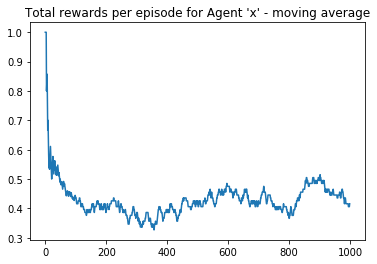

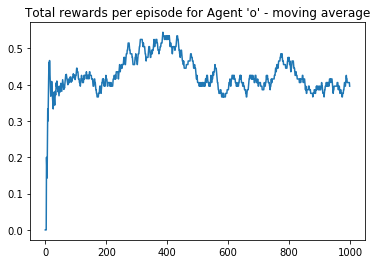

Final score board:
{'x': 422, 'o': 429, ' ': 149}


In [6]:
# plot(y=total_rewards[Environment.SYMBOL_X], title="Rewards for Agent with symbol='x'", show=True)
# plot(y=total_rewards[Environment.SYMBOL_O], title="Rewards for Agent with symbol='o'", show=True)

plot_moving_avg(total_rewards[Environment.SYMBOL_X], title="Total rewards per episode for Agent 'x' - moving average")
plot_moving_avg(total_rewards[Environment.SYMBOL_O], title="Total rewards per episode for Agent 'o' - moving average")

print("Final score board:")
print(env.score)

### Save best model on disk

In [7]:
# Get best model from score board

# Remove draws from score
score = {k: v for (k, v) in env.score.items() if k != Environment.sym_repr[Environment.SYMBOL_EMPTY]}

# Get best agent based on the max score recorded
best_sym = max(score.items(), key=lambda x: x[1])[0]
best_agent = agent_x if best_sym == Environment.sym_repr[Environment.SYMBOL_X] else agent_o

print("Saving model on %s..." % path_to_model)
best_agent.save(path_to_model)


Saving model on /models/tateti_model.pkl...
